In [1]:
%matplotlib notebook
import pybt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from cpymad.madx import Madx
from cpymad import libmadx
from scipy.optimize import minimize
import pybobyqa

import itertools

import warnings
from IPython.core.display import display, HTML, Markdown

display(HTML("<style>.rendered_html { font-size: 17px; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

def printmd(string):
    display(Markdown(string))
warnings.filterwarnings('ignore')


plt.ion()


In [2]:
pd.options.display.min_rows = 200
pd.options.display.max_rows = 200

In [3]:
madx = Madx(libmadx=None)

madx.option(rbarc=False)
madx.call(file='git_acc_models/acc-models-tls/sps_extraction/tt20t2/tt20t2.seq')

madx.call(file='git_acc_models/acc-models-tls/sps_extraction/tt20t2_sftpro/line/t2_protons_SE_noqsplit.str')
madx.call(file='git_acc_models/acc-models-tls/sps_extraction/tt20t2_sftpro/line/tt20_initial_conditions.inp')

madx.beam(particle='proton', pc=400)    
beta0 = {'alfx':madx.globals['alfx0'],'betx':madx.globals['betx0'],'dx':madx.globals['dx0'],'dpx':madx.globals['dpx0'],'alfy':madx.globals['alfy0'],'bety':madx.globals['bety0'],'dy':madx.globals['dy0'],'dpy':madx.globals['dpy0']}
madx.select(flag='twiss', column=['aper_1', 'aper_2'])


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.08.18 06:51:49      +
  ++++++++++++++++++++++++++++++++++++++++++++
option, -warn;

none = 0;

kqtld2101 := -0.01000349564;

amdlh2101 := 0.00047034;

amdlv2101 := 0;

kqtlf2102 := 0.01067616941;

amdlh2102 := 0.00022994;

amdlv2102 := 0;

kqtld2103 := -0.007196791095;

ambe210306 := -0.00824715;

ambe2103m := -0.0084451;

kqnlf2104 := 0.00489537532;

kqnld2105m := -0.007740132;

amdsv2105 := 0;

kqnlf2106m := -kqnld2105m;

amdsh2106 := 0;

amdsv2107 := 0;

ambb2109 := 0.0082762;

amdsv2111 := 0;

kqnl2112m := 0.006481246946;

kqts2112m := kqnl2112m;

amdsh2112 := 0;

amdlv2112 := 0;

kqnl2113m := -0.009636837839;

ambe211312 := 0.00831115;

kqtl2114m := 0.006577291064;

kqnl2115m := -0.01080859081;

amdlv2115 := 0;

ampls2115 := 0;

kqtl2116m := 0.01197624776;

kqts2116m :=

True

In [4]:
# nonminal conditions
madx.use(sequence='tt20t2', range_='#s/ENDTT21')
madx.use(sequence='tt20t2', range_='#s/#e')
twiss_nominal = madx.twiss(**beta0).dframe()
twiss_nominal_end = twiss_nominal.loc['endtt21']

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
          875.6214                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
       2.270313403                  0         1184.63511        5.246784207 

             dxrms             xcomax             xcorms                 q2 
       1.682316787                  0                  0        1.722215861 

               dq2            betymax              dymax              dyrms 
                 0        37771.64024        9.998596242        2.705292985 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

           synch_6            

In [5]:
for _, row in twiss_nominal[twiss_nominal['keyword']=='quadrupole'].iterrows():
    print(row.name, madx.elements[row.name].defs['k1'], madx.elements[row.name]['k1'])
    

qtld.210100 kqtld2101 -0.01000349564
qtlf.210200 kqtlf2102 0.01067616941
qtld.210300 kqtld2103 -0.007196791095
qnlf.210400 kqnlf2104 0.00489537532
qnld.210500 kqnld2105m -0.007740132
qnlf.210600 kqnlf2106m 0.007740132
qnld.210700 kqnld2105m -0.007740132
qnlf.210800 kqnlf2106m 0.007740132
qnld.210900 kqnld2105m -0.007740132
qnlf.211000 kqnlf2106m 0.007740132
qnld.211100 kqnld2105m -0.007740132
qnl.211200 kqnl2112m 0.006481246946
qts.211206 kqts2112m 0.006481246946
qnl.211300 kqnl2113m -0.009636837839
qnl.211306 kqnl2113m -0.009636837839
qtl.211400 kqtl2114m 0.006577291064
qtl.211406 kqtl2114m 0.006577291064
qnl.211500 kqnl2115m -0.01080859081
qnl.211506 kqnl2115m -0.01080859081
qtl.211600 kqtl2116m 0.01197624776
qts.211606 kqts2116m 0.01197624776
qm.211700 kqm2117 -0.0120542556
qsld.220100 kqsld2201 -0.007545
qtaf.220200 kqtaf2202m 0.0104398
qtaf.220300 kqtaf2202m 0.0104398
qtad.220400 kqtad2204 -0.0075953
qtad.230200 kqtad2302 -0.00345
qtaf.230300 kqtaf2303 0.00388
qtaf.230400 kqtaf230

# new optics with smaller beam vertical beam size

In [6]:
madx.options(warn=False, echo=False, twiss_print=False, info=False)
madx.call(file='git_acc_models/acc-models-tls/sps_extraction/tt20t2_sftpro/line/t2_protons_SE_noqsplit.str')

list_vars = ['kqtld2103', 'kqnlf2104', 'kqnld2105m', 'kqnl2113m', 'kqtl2114m', 'kqnl2115m', 'kqtl2116m', 'kqm2117']
bnds = ()

k0 = []
for var in list_vars:
    if madx.globals[var] > 0:
        bnds += ((0, 0.016),)
    else:
        bnds += ((-0.016, 0),)
    k0.append(madx.globals[var])

print(bnds)

index = madx.twiss(**beta0).row_names().index('endtt21')

def func(ks, verbose=False):
    for var, k in zip(list_vars, ks):
        madx.globals[var] = k
    
    twiss_end = pd.Series(madx.twiss(**beta0)[index])

    diff = []
    diff.append( (twiss_end['betx']-twiss_nominal_end['betx'])**2)
    diff.append( (twiss_end['alfx']-twiss_nominal_end['alfx'])**2*10)
    diff.append( (twiss_end['bety']-twiss_nominal_end['bety']*0.25)**2*0.1)
    diff.append( (twiss_end['alfy']-twiss_nominal_end['alfy'])**2*10)
    diff.append((twiss_end['dx']-twiss_nominal_end['dx'])**2*5)
    diff.append((twiss_end['dy']-twiss_nominal_end['dy'])**2*20)

    
    summ = np.array(diff).sum()
    print(' '*200, end='\r')
    printout = '{:7.5f} '*len(ks)
    printout += '    ' + '{:5.3f} '*len(diff)
    printout += '    ' + '{:5.3f} '
    print(printout.format(*ks, *diff, summ), end='\r')
    
    if verbose:
        print('')
        with pd.option_context('expand_frame_repr', False):
            print(pd.DataFrame((twiss_nominal_end[['alfx', 'betx', 'alfy', 'bety', 'dx', 'dpx', 'dy', 'dpy']],
                                twiss_end[['alfx', 'betx', 'alfy', 'bety', 'dx', 'dpx', 'dy', 'dpy']])))

    return summ
    
    

((-0.016, 0), (0, 0.016), (-0.016, 0), (-0.016, 0), (0, 0.016), (-0.016, 0), (0, 0.016), (-0.016, 0))


In [7]:
k_final = [-0.0081069 ,  0.00519051, -0.00786669, -0.00890849,  0.00619578, -0.01023237,  0.01207489, -0.01224798]

# k0 = k_final

# res = pybobyqa.solve(func, bounds=tuple(np.array(bnds).T), x0=k0, rhobeg=1e-3, rhoend=1e-10, maxfun=5000, print_progress=False, seek_global_minimum=True)

# res = minimize(func, bounds=bnds, x0=k0, method='COBYLA' , options={'rhobeg':0.003, 'tol':1e-9})
# print('\n\n ', res.x, '\n \n')
# res = minimize(func, bounds=bnds, x0=res.x, method='L-BFGS-B' , options={'gtol':1e-2, 'eps':1e-9, 'ftol':1e-9, 'maxiter':1000})

# k_final = res.x



In [8]:

func(k_final, True)
print(' '*200, end='\n')

twiss_modified = madx.twiss(**beta0).dframe()

print('param    ', ('{:10s}  '*len(k0)).format(*list_vars))
print('k0       ', ('{:10.6f}  '*len(k0)).format(*k0))
print('kfinal   ', ('{:10.6f}  '*len(k0)).format(*k_final))
print('kvar %   ', ('{:10.6f}  '*len(k0)).format(*[(a-b)/a*100 for a, b, in zip(k_final, k0)]))

-0.00811 0.00519 -0.00787 -0.00891 0.00620 -0.01023 0.01207 -0.01225     0.000 0.070 0.000 0.000 0.251 0.000     0.322 
               alfx       betx      alfy          bety        dx       dpx        dy       dpy
endtt21    0.715848  27.215185 -0.020899  23986.991337 -0.264828 -0.038039 -1.800523 -0.001488
Unnamed 0  0.799691  27.212246 -0.021268   5996.761193 -0.040563 -0.051840 -1.800250 -0.001136
                                                                                                                                                                                                        
param     kqtld2103   kqnlf2104   kqnld2105m  kqnl2113m   kqtl2114m   kqnl2115m   kqtl2116m   kqm2117     
k0         -0.007197    0.004895   -0.007740   -0.009637    0.006577   -0.010809    0.011976   -0.012054  
kfinal     -0.008107    0.005191   -0.007867   -0.008908    0.006196   -0.010232    0.012075   -0.012248  
kvar %     11.226349    5.686044    1.608783   -8.175884   -6.157595   -5

<IPython.core.display.Javascript object>


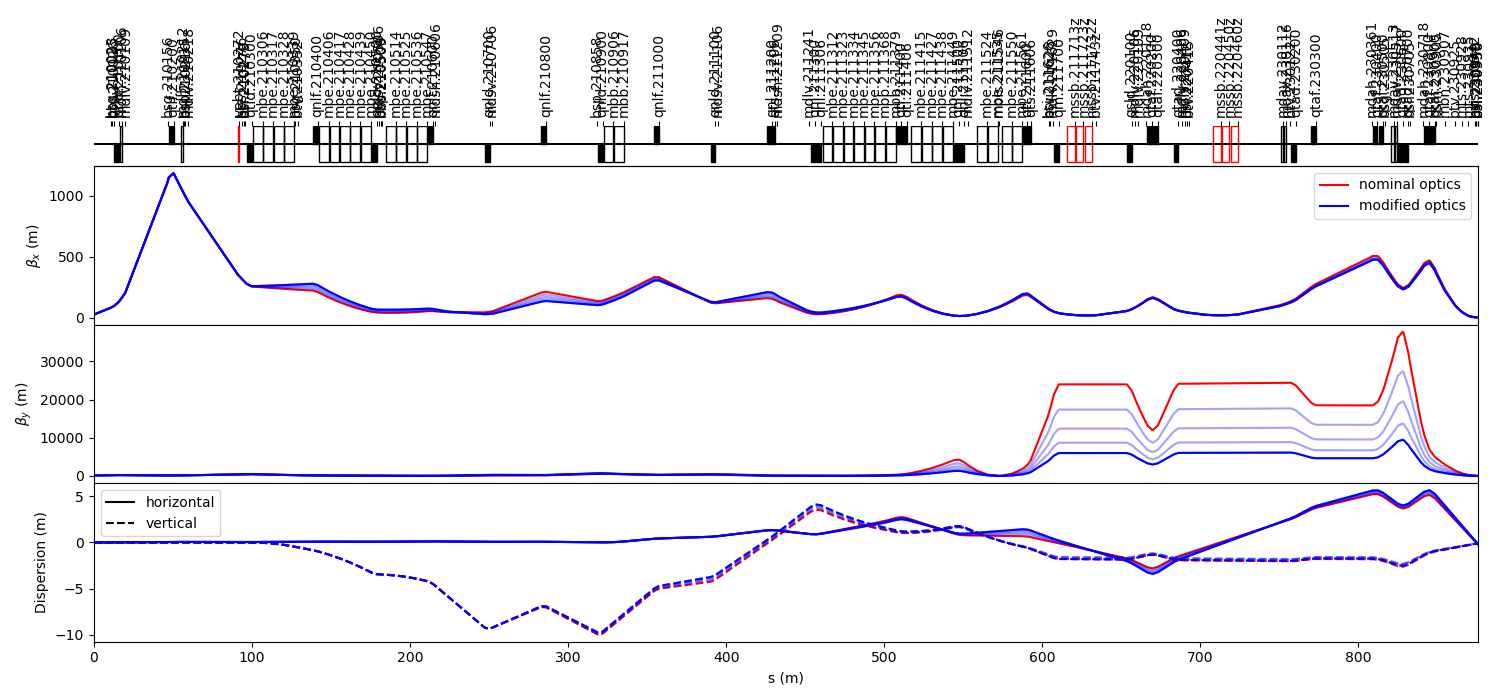

(0.0, 875.621399999998)

In [9]:
fig_syn = plt.figure(figsize=(15,7))
tw = twiss_nominal

gs = mpl.gridspec.GridSpec(4, 1, height_ratios=[1, 4, 4, 4])
ax1 = fig_syn.add_subplot(gs[0])
ax2 = fig_syn.add_subplot(gs[1], sharex=ax1)
ax3 = fig_syn.add_subplot(gs[2], sharex=ax1)
ax4 = fig_syn.add_subplot(gs[3], sharex=ax1)

plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

# top plot is synoptic
ax1.axis('off')
ax1.set_ylim(-1.2, 1)

ax2.set_ylabel(r'$\beta_x$ (m)')
ax2.plot([], [], 'r-', label='nominal optics')
ax2.plot([], [], 'b-', label='modified optics')
ax2.legend()

ax3.set_ylabel(r'$\beta_y$ (m)')
ax4.plot([], [], 'k-', label='horizontal')
ax4.plot([], [], 'k--', label='vertical')
ax4.legend()
ax4.set_ylabel('Dispersion (m)')

ax2.plot(twiss_nominal['s'], twiss_nominal['betx'], 'r-')
ax2.plot(twiss_modified['s'], twiss_modified['betx'], 'b-')

ax3.plot(twiss_nominal['s'], twiss_nominal['bety'], 'r-')
ax3.plot(twiss_modified['s'], twiss_modified['bety'], 'b-')

ax4.plot(twiss_nominal['s'], twiss_nominal['dx'], 'r-')
ax4.plot(twiss_modified['s'], twiss_modified['dx'], 'b-')
ax4.plot(twiss_nominal['s'], twiss_nominal['dy'], 'r--')
ax4.plot(twiss_modified['s'], twiss_modified['dy'], 'b--')


ax1.plot([0, tw['s'].max()], [0, 0], 'k-')
for _, row in tw.iterrows():

    if row['keyword'] == 'quadrupole':
        _ = ax1.add_patch(
            mpl.patches.Rectangle(
                (row['s']-row['l'], 0), row['l'], np.sign(row['k1l']),
                facecolor='k', edgecolor='k'))
    elif (row['keyword'] == 'rbend' or 
          row['keyword'] == 'sbend'):
        _ = ax1.add_patch(
            mpl.patches.Rectangle(
                (row['s']-row['l'], -1), row['l'], 2,
                facecolor='None', edgecolor='k'))
    elif row['keyword'] == 'collimator':
        _ = ax1.add_patch(
            mpl.patches.Rectangle(
                (row['s']-row['l'], -1), row['l'], 2,
                facecolor='None', edgecolor='k', hatch='\\/\\/\\/'))
    elif row['keyword'] == 'instrument':
        _ = ax1.add_patch(
            mpl.patches.Rectangle(
                (row['s']-row['l'], -1), row['l'], 2,
                facecolor='None', edgecolor='r'))


axnames = ax1.twiny()
axnames.spines['top'].set_visible(False)
axnames.spines['left'].set_visible(False)
axnames.spines['right'].set_visible(False)
ax1._shared_x_axes.join(ax1, axnames)

ticks, ticks_labels = list(), list()
for keyword in ['quadrupole', 'rbend', 'sbend', 'instrument', 'collimator', 'monitor', 'kicker', 'hkicker', 'vkicker']:
    sub_twiss = tw[tw['keyword'] == keyword]
    ticks += list(sub_twiss['s'])
    ticks_labels += list(sub_twiss.index)

axnames.set_xticks(ticks)
axnames.set_xticklabels(ticks_labels, rotation=90)

ax4.set_xlabel('s (m)')

fig_syn.tight_layout()
fig_syn.subplots_adjust(hspace=0)
ax1.set_xlim(0, tw['s'].max())



In [12]:
# printout and partial application of the knob
knob = lambda frac : [frac*a + (1-frac)*b for a, b in zip(k_final, k0)]
madx.select(flag='twiss', clear=True)
madx.select(flag='twiss', column=['name', 's', 'betx', 'mux', 'alfx', 'dx', 'bety', 'muy', 'alfy', 'dy', 'l',  'angle', 'k1l', 'k2l'])

for frac in [0.25, 0.50, 0.75, 1.0]:
    print('kob at {:03f}% \n'.format(int(frac*100)), knob(frac))
    func(knob(frac), True)
    print(' ')
    twiss_knob = madx.twiss(**beta0, file='twiss_tt21_bety_knob{:03d}.tfs'.format(int(frac*100))).dframe()
    print('vertical beam size at {:5.2f}% of nominal'.format((np.sqrt(twiss_knob.loc['endtt21']['bety']/twiss_nominal.loc['endtt21']['bety']))))

    ax2.plot(twiss_knob['s'], twiss_knob['betx'], 'b-', alpha=0.2)

    ax3.plot(twiss_knob['s'], twiss_knob['bety'], 'b-', alpha=0.2)

    ax4.plot(twiss_knob['s'], twiss_knob['dx'], 'b-', alpha=0.2)
    ax4.plot(twiss_knob['s'], twiss_knob['dy'], 'b--', alpha=0.2)
    print('\n\n\n')

kob at 25.000000% 
 [-0.00742431832125, 0.00496915899, -0.0077717715, -0.00945475087925, 0.006481913298, -0.0106645356075, 0.012000908319999998, -0.012102686699999999]
-0.00742 0.00497 -0.00777 -0.00945 0.00648 -0.01066 0.01200 -0.01210     0.007 0.015 12961686.636 0.002 0.021 0.622     12961687.303 
               alfx       betx      alfy          bety        dx       dpx        dy       dpy
endtt21    0.715848  27.215185 -0.020899  23986.991337 -0.264828 -0.038039 -1.800523 -0.001488
Unnamed 0  0.755060  27.129734 -0.005907  17381.688166 -0.200764 -0.041756 -1.624145 -0.001413
 
vertical beam size at  0.85% of nominal




kob at 50.000000% 
 [-0.0076518455475, 0.00504294266, -0.0078034110000000005, -0.009272663919500001, 0.006386535532, -0.010520480405, 0.01202556888, -0.0121511178]
-0.00765 0.00504 -0.00780 -0.00927 0.00639 -0.01052 0.01203 -0.01215     0.003 0.045 4093251.231 0.001 0.075 1.010     4093252.364 
               alfx       betx      alfy          bety        dx       

In [13]:
print('knob, in k and in absolute values')

print('{:10s}   {:15s}   {:5s}'.format('var', 'value', 'relative change compared to nominal (%)'))
for i, k_var in enumerate(list_vars):
    print('{:10s}   {:15.10f}   {:5.2f}'.format(k_var, k_final[i]-k0[i], (k_final[i]-k0[i])/k_final[i]*100))

knob, in k and in absolute values
var          value             relative change compared to nominal (%)
kqtld2103      -0.0009101089   11.23
kqnlf2104       0.0002951347    5.69
kqnld2105m     -0.0001265580    1.61
kqnl2113m       0.0007283478   -8.18
kqtl2114m      -0.0003815111   -6.16
kqnl2115m       0.0005762208   -5.63
kqtl2116m       0.0000986422    0.82
kqm2117        -0.0001937244    1.58


# position knobs

<IPython.core.display.Javascript object>


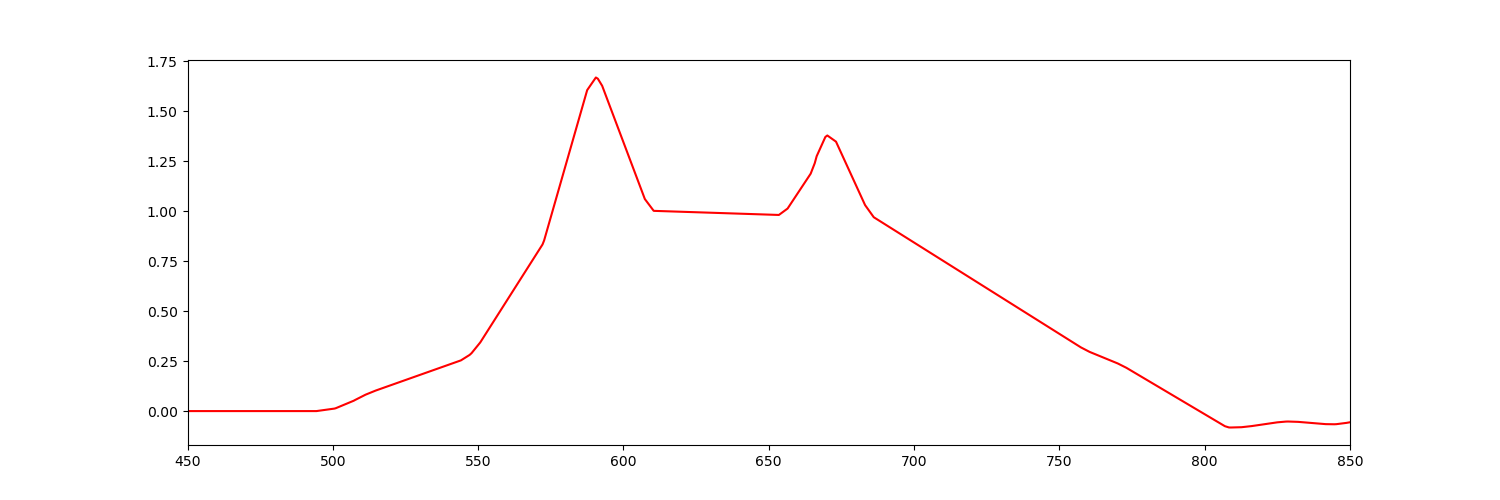

(450.0, 850.0)

In [14]:
madx.use(sequence='tt20t2')
madx.select(flag='error', clear=True)
madx.select(flag='error', pattern='MBB.211368')
madx.select(flag='error', pattern='MBB.211379')
madx.command.efcomp(dkn=[-4.04e-6])

madx.globals['ampls2115'] = 27.91e-6
madx.globals['amdah2201'] = 30.83e-6
madx.globals['kmdah2303'] = 8.27e-6

tw = madx.twiss(**beta0).dframe()

fig, ax = plt.subplots(figsize=(15,5))


ax.plot(tw['s'], tw['x']*1e3, 'r-')
ax.set_xlim(450, 850)


In [85]:
for _, row in twiss_nominal[twiss_nominal.index.str.contains('bsi')].iterrows():
    print(row.name)
    

bsi.210216
bsi.210278
bsi.210279
bsi.211626
bsi.220412
bsi.230705
bsi.230949
bsi.230950


In [86]:
for _, row in twiss_nominal[twiss_nominal.index.str.contains('bsg')].iterrows():
    print(row.name)


bsg.210023
bsg.210156
bsg.210350
bsgv.211244
bsgv.211515
bsgv.211705
bsgh.211706s
bsgh.211706
bsgh.211706e
bsgv.220075s
bsgv.220075
bsgv.220075e
bsgv.220414
bsgv.220431
bsgh.220432
bsgv.230111s
bsgv.230111
bsgv.230111e
bsg.230505


In [92]:
for _, row in twiss_nominal[twiss_nominal['keyword']=='kicker'].iterrows():
    print(row.name, madx.elements[row.name].defs['hkick'], madx.elements[row.name].defs['vkick'])
for _, row in twiss_nominal[twiss_nominal['keyword']=='hkicker'].iterrows():
    print(row.name, madx.elements[row.name].defs['kick'])
for _, row in twiss_nominal[twiss_nominal['keyword']=='vkicker'].iterrows():
    print(row.name, madx.elements[row.name].defs['kick'])


mbn.230907 ambn2309 0.0
mts.230928 amtn2309 0.0
mts.230935 amtn2309 0.0
mts.230942 amtn2309 0.0
mdsh.210606 amdsh2106
mdsh.211209 amdsh2112
mpls.211546 ampls2115
mdah.220118 amdah2201
mdah.230361 kmdah2303
mdah.230718 kmdah2307
mdlv.210109 amdlv2101
mdlv.210218 amdlv2102
mdsv.210506 amdsv2105
mdsv.210706 amdsv2107
mdsv.211106 amdsv2111
mdlv.211241 amdlv2112
mdlv.211512 amdlv2115
mdlv.211629 amdlv2116
mdlv.220106 amdlv2201m
mdlv.220109 amdlv2201m
mdlv.220406 amdlv2204m
mdlv.220409 amdlv2204m


In [118]:
for corrector in correctors:
    print(madx.elements[corrector].base_type.name)


rbend
rbend
hkicker
hkicker
hkicker


In [125]:
correctors = ['mdlh.210106', 'mdlh.210212', 'mdsh.210606', 'mbb.210906', 'mdsh.211209', 'mbb.211368', 'mpls.211546']
for corrector in correctors:
    el = madx.elements[corrector]
    if el.base_type.name == 'hkicker' or el.base_type.name == 'vkicker':
        print(el.name, el.defs['kick'])
        
    elif el.base_type.name == 'kicker':
        print(el.name, el.defs['hkick'])
        
    elif el.base_type.name == 'rbend':
        print(el.name, el.defs['angle'])
         

mdlh.210106 amdlh2101
mdlh.210212 amdlh2102
mdsh.210606 amdsh2106
mbb.210906 ambb2109
mdsh.211209 amdsh2112
mbb.211368 ambb2109
mpls.211546 ampls2115


In [119]:
correctors = ['mdlh.210106', 'mdlh.210212', 'mdsh.210606', 'mdsh.211209', 'mpls.211546']
target_position = 'bsi.210279'

for corrector in l

SyntaxError: invalid syntax (<ipython-input-119-446cddee28c5>, line 6)

In [ ]:
correctors = ['mdlh.210106', 'mdlh.210212', 'mdsh.210606', 'mbb.210906', 'mdsh.211209', 'mbb.211368', 'mpls.211546']
corrector_vars = ['amdlh2101', 'amdlh2102', 'amdsh2106', 'amdsh2112', 'ampls2115']
corrector_key = ['angle', 'angle', 'kick', 'kick', 'kick']


In [90]:
madx.options(warn=False, echo=False, twiss_print=False, info=False)

list_vars = ['kqtld2103', 'kqnlf2104', 'kqnld2105m', 'kqnl2113m', 'kqtl2114m', 'kqnl2115m', 'kqtl2116m', 'kqm2117']
bnds = ()

k0 = []
for var in list_vars:
    if madx.globals[var] > 0:
        bnds += ((0, 0.016),)
    else:
        bnds += ((-0.016, 0),)
    k0.append(madx.globals[var])

print(bnds)

index = madx.twiss(**beta0).row_names().index('endtt21')

def func(ks, verbose=False):
    for var, k in zip(list_vars, ks):
        madx.globals[var] = k
    
    twiss_end = pd.Series(madx.twiss(**beta0)[index])

    diff = []
    diff.append( (twiss_end['betx']-twiss_nominal_end['betx'])**2)
    diff.append( (twiss_end['alfx']-twiss_nominal_end['alfx'])**2*10)
    diff.append( (twiss_end['bety']-twiss_nominal_end['bety']*0.25)**2*0.1)
    diff.append( (twiss_end['alfy']-twiss_nominal_end['alfy'])**2*10)
    diff.append((twiss_end['dx']-twiss_nominal_end['dx'])**2*5)
    diff.append((twiss_end['dy']-twiss_nominal_end['dy'])**2*20)

    
    summ = np.array(diff).sum()
    print(' '*200, end='\r')
    printout = '{:7.5f} '*len(ks)
    printout += '    ' + '{:5.3f} '*len(diff)
    printout += '    ' + '{:5.3f} '
    print(printout.format(*ks, *diff, summ), end='\r')
    
    if verbose:
        print('')
        with pd.option_context('expand_frame_repr', False):
            print(pd.DataFrame((twiss_nominal_end[['alfx', 'betx', 'alfy', 'bety', 'dx', 'dpx', 'dy', 'dpy']],
                                twiss_end[['alfx', 'betx', 'alfy', 'bety', 'dx', 'dpx', 'dy', 'dpy']])))

    return summ


'mbn.230907'